<a href="https://colab.research.google.com/github/cbologa/notebook/blob/main/RingSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

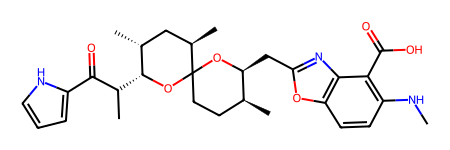

In [ ]:
#@title Input SMILES string, then hit `Runtime` -> `Run all`
!pip install --upgrade --quiet rdkit
from rdkit.Chem import *
smiles = 'C[C@H]1CCC2([C@@H](C[C@H]([C@H](O2)C(C)C(=O)C3=CC=CN3)C)C)O[C@H]1CC4=NC5=C(O4)C=CC(=C5C(=O)O)NC' #@param {type:"string"}
mol = MolFromSmiles(smiles)
mol

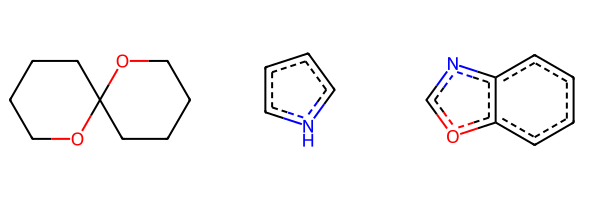

In [ ]:
#@title Display ring systems
#get atom sets from ring systems
RemoveStereochemistry(mol)
atom_rings = mol.GetRingInfo().AtomRings()
ring_atoms_sets = []
for ring in atom_rings:
  ring_atoms = set(ring)
  new_ring_atoms_sets = []
  for ring_atoms_set in ring_atoms_sets:
    atoms_in_common = len(ring_atoms.intersection(ring_atoms_set))
    if atoms_in_common:
      ring_atoms = ring_atoms.union(ring_atoms_set)
    else:
      new_ring_atoms_sets.append(ring_atoms_set)
  new_ring_atoms_sets.append(ring_atoms)
  ring_atoms_sets = new_ring_atoms_sets
#get ring systems
ring_systems_list = []
for atoms_set in ring_atoms_sets:
  bond_idx_list = []
  for bond in mol.GetBonds():
    if bond.GetBeginAtomIdx() in atoms_set and bond.GetEndAtomIdx() in atoms_set:
      bond_idx_list.append(bond.GetIdx())
  submol = rdmolops.PathToSubmol(mol, bond_idx_list)
  ring_systems_list.append(submol)
Draw.MolsToGridImage(ring_systems_list)

In [ ]:
#@title Print ring systems SMILES
[MolToSmiles(submol) for submol in ring_systems_list]

['[CH]1[CH]OC2([CH]C1)CC[CH][CH]O2', 'c1cc[nH]c1', 'c1ccc2ocnc2c1']